In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import os
import pickle
import numpy as np

In [6]:
results_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'results'))
model_name = 'ShallowFBCSPNet'
dataset_name = 'Schirrmeister2017'

# file_1_name = 'ShallowFBCSPNet_BNCI2014_001_finetuning_2'
file_1_name = f'{model_name}_{dataset_name}_finetune_4'
file_1_path = os.path.join(results_dir, f'{file_1_name}.pkl')

# file_2_name = 'ShallowFBCSPNet_BNCI2014_001_from_scratch_2'
file_2_name = f'{model_name}_{dataset_name}_from_scratch_3'
file_2_path = os.path.join(results_dir, f'{file_2_name}.pkl')

if os.path.exists(file_1_path) and os.path.getsize(file_1_path) > 0:
    with open(file_1_path, 'rb') as f:
        exp_finetune = pickle.load(f)
    print("Dictionary loaded successfully.")
else:
    print(f"Error: File '{file_1_path}' does not exist or is empty.")

if os.path.exists(file_2_path) and os.path.getsize(file_2_path) > 0:
    with open(file_2_path, 'rb') as f:
        exp_from_scratch = pickle.load(f)
    print("Dictionary loaded successfully.")
else:
    print(f"Error: File '{file_2_path}' does not exist or is empty.")

Dictionary loaded successfully.
Dictionary loaded successfully.


In [5]:
df_results_finetune = pd.DataFrame(exp_finetune)
df_results_scratch = pd.DataFrame(exp_from_scratch)

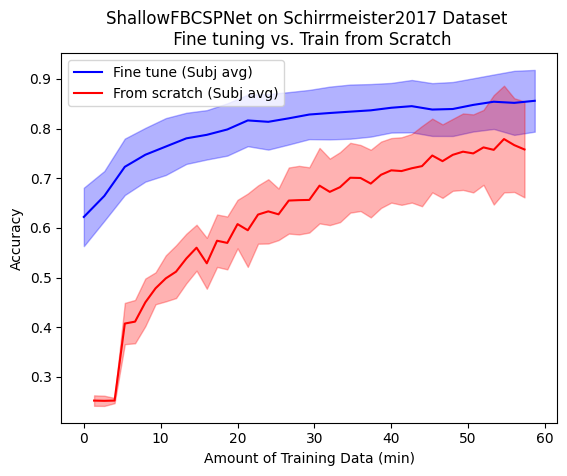

In [8]:
data_unit = 'min'

if data_unit == 'min':
    unit = 4 / 60
elif data_unit == 'sec':
    unit = 4
else:
    unit = 1

# Fine tune curve
df_finetune_rep_avg = df_results_finetune.applymap(lambda x: np.mean(x))
finetune_subject_averaged_df = df_finetune_rep_avg.mean(axis=1)
finetune_std_err_df = df_finetune_rep_avg.sem(axis=1)
finetune_conf_interval_df = stats.t.interval(0.95, len(df_finetune_rep_avg.columns) - 1, 
                                             loc=finetune_subject_averaged_df, scale=finetune_std_err_df)

finetune_x = df_finetune_rep_avg.index * unit
plt.plot(finetune_x, finetune_subject_averaged_df, label='Fine tune (Subj avg)', color='b')
plt.fill_between(finetune_x, finetune_conf_interval_df[0], finetune_conf_interval_df[1], color='b', alpha=0.3)

# Train from scratch curve
scratch_subject_averaged_df = df_results_scratch.mean(axis=1)
scratch_std_err_df = df_results_scratch.sem(axis=1)
scratch_conf_interval_df = stats.t.interval(0.95, len(df_results_scratch.columns) - 1, 
                                            loc=scratch_subject_averaged_df, scale=scratch_std_err_df)

scratch_x = scratch_subject_averaged_df.index * unit
plt.plot(scratch_x, scratch_subject_averaged_df, label='From scratch (Subj avg)', color='r')
plt.fill_between(scratch_x, scratch_conf_interval_df[0], scratch_conf_interval_df[1], color='r', alpha=0.3)

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel(f'Amount of Training Data ({data_unit})')
plt.title(f'{model_name} on {dataset_name} Dataset \n Fine tuning vs. Train from Scratch')
plt.savefig(os.path.join(results_dir, f'{model_name}_{dataset_name}_finetune_vs_fromscratch.png'))